In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
lap_data = pd.read_csv("results\\21S3\\3280#VRS_GT_Sprint_Series\\6#Circuit_de_Spa-Francorchamps#Endurance\\3280_6_lap_data.csv", index_col = 0)
lap_data_counts = lap_data.groupby(['custid']).count().nlargest(10, 'lap_time')
lap_data_counts
#lap_data = lap_data.groupby(['subsessionid','custid']).mean().unstack()

,weather_temp_value,oldirating,carid,lap_time,ccName,subsessionid,lapnum,flags
custid,,,,,,,,
625067,536,536,536,536,536,536,536,536
535188,479,479,479,479,479,479,479,479
461408,455,455,455,455,455,455,455,455
649586,447,447,447,447,447,447,447,447
601298,442,442,442,442,442,442,442,442
400298,391,391,391,391,391,391,391,391
446651,388,388,388,388,388,388,388,388
627200,387,387,387,387,387,387,387,387
246994,366,366,366,366,366,366,366,366


In [3]:
sns.set_theme(rc={'figure.figsize':(30,11), "patch.edgecolor": 'None'},style = 'dark')
lap_data_most_driven = lap_data[lap_data['custid'] == 625067]
lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['flags'] == 0]
cutoff_time = lap_data_most_driven['lap_time'].min(axis=0) * 1.06
print(cutoff_time)
lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['lap_time'] < cutoff_time]
lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['lapnum'] != 0]
lap_data_most_driven

1469720.74


,weather_temp_value,custid,oldirating,carid,lap_time,ccName,subsessionid,lapnum,flags
255265,70.395027,625067,1721,73,1409379.0,GT3+Class,39781422,3,0
255266,70.395027,625067,1721,73,1426030.0,GT3+Class,39781422,4,0
255268,70.395027,625067,1721,73,1451041.0,GT3+Class,39781422,6,0
255272,70.395027,625067,1721,73,1414381.0,GT3+Class,39781422,10,0
255275,70.395027,625067,1721,73,1426138.0,GT3+Class,39781422,13,0
...,...,...,...,...,...,...,...,...,...
255790,65.000000,625067,1751,73,1396981.0,GT3+Class,39876989,10,0
255791,65.000000,625067,1751,73,1416050.0,GT3+Class,39876989,11,0
255795,65.000000,625067,1751,73,1420510.0,GT3+Class,39876989,15,0
255796,65.000000,625067,1751,73,1429753.0,GT3+Class,39876989,16,0


<AxesSubplot:xlabel='subsessionid', ylabel='lap_time'>

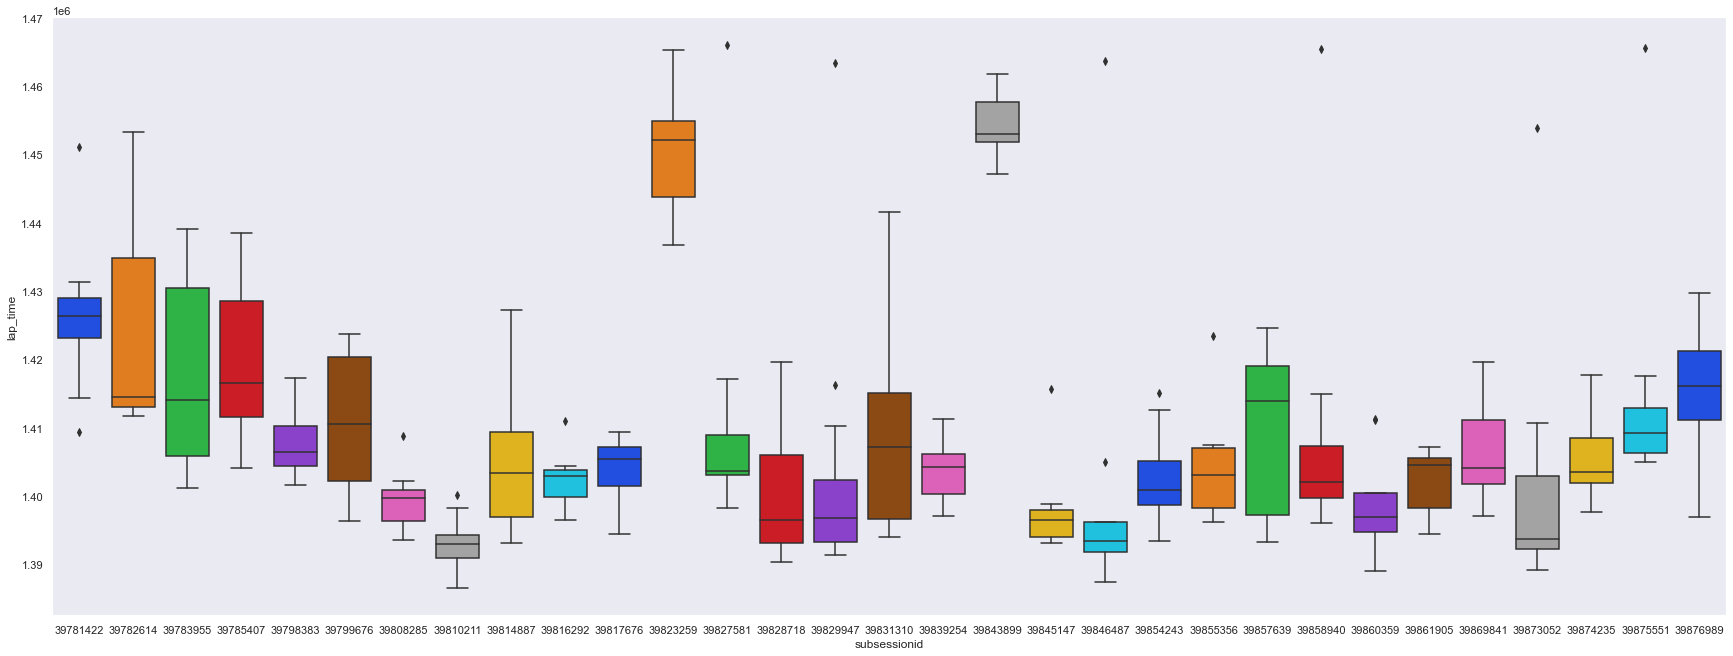

In [4]:
sns.boxplot(data = lap_data_most_driven, x = 'subsessionid', y = 'lap_time', palette = "bright")

<AxesSubplot:xlabel='lapnum', ylabel='lap_time_iracing_seconds'>

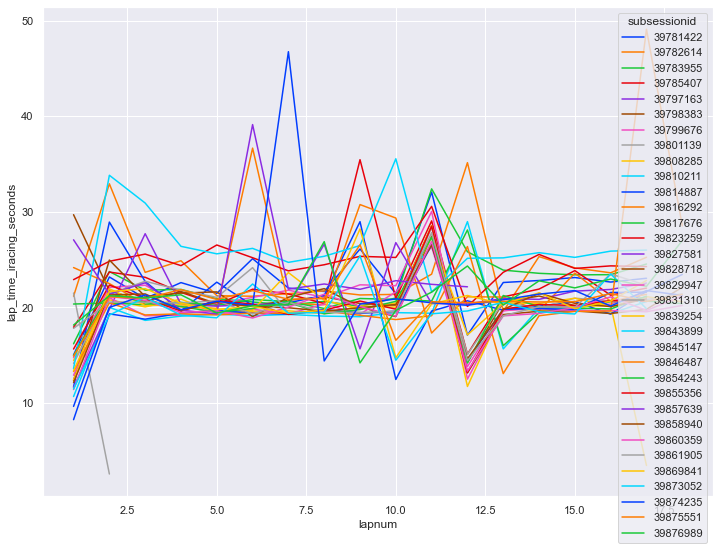

In [5]:
sns.set(rc={'figure.figsize':(12,9)})

#formats the time to make it simlilar to how iracing displays time
def format_duration(x):
    seconds, milliseconds  = divmod(x, 10000)
    milliseconds = int(milliseconds/10)
    minutes, seconds = divmod(seconds, 60)
    seconds = int(seconds)
    minutes = int(minutes)
    return '{:02d}:{:02d}.{:03d}'.format(minutes, seconds, milliseconds)

def get_seconds(x):
    minutes, seconds = x.split(":")
    return seconds
def get_minutes(x):
    minutes, seconds = x.split(":")
    return minutes

lap_data_most_driven = lap_data[lap_data['custid'] == 625067]
#lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['subsessionid'] == 39783955]
#lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['flags'] == 0]
#cutoff_time = lap_data_most_driven['lap_time'].min(axis=0) * 1.07
#print(cutoff_time)
#lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['lap_time'] < cutoff_time]
lap_data_most_driven = lap_data_most_driven[lap_data_most_driven['lapnum'] != 0]

lap_data_most_driven['lap_time_iracing'] = lap_data_most_driven['lap_time'].apply(format_duration)

lap_data_most_driven['lap_time_iracing_seconds'] = lap_data_most_driven['lap_time_iracing'].apply(get_seconds).str.strip().astype(float)
lap_data_most_driven['lap_time_iracing_minutes'] = lap_data_most_driven['lap_time_iracing'].apply(get_minutes)

sns.lineplot(data = lap_data_most_driven, x = 'lapnum', y = 'lap_time_iracing_seconds', hue = 'subsessionid', palette = "bright")

In [6]:
lap_data_most_driven

,weather_temp_value,custid,oldirating,carid,lap_time,ccName,subsessionid,lapnum,flags,lap_time_iracing,lap_time_iracing_seconds,lap_time_iracing_minutes
255263,70.395027,625067,1721,73,1350240.0,GT3+Class,39781422,1,8256,02:15.024,15.024,02
255264,70.395027,625067,1721,73,1431925.0,GT3+Class,39781422,2,4,02:23.192,23.192,02
255265,70.395027,625067,1721,73,1409379.0,GT3+Class,39781422,3,0,02:20.937,20.937,02
255266,70.395027,625067,1721,73,1426030.0,GT3+Class,39781422,4,0,02:22.603,22.603,02
255267,70.395027,625067,1721,73,1414762.0,GT3+Class,39781422,5,4,02:21.476,21.476,02
...,...,...,...,...,...,...,...,...,...,...,...,...
255794,65.000000,625067,1751,73,1427871.0,GT3+Class,39876989,14,68,02:22.787,22.787,02
255795,65.000000,625067,1751,73,1420510.0,GT3+Class,39876989,15,0,02:22.051,22.051,02
255796,65.000000,625067,1751,73,1429753.0,GT3+Class,39876989,16,0,02:22.975,22.975,02
255797,65.000000,625067,1751,73,1422038.0,GT3+Class,39876989,17,0,02:22.203,22.203,02
